# <center>**PRÁCTICA DE BASES DE DATOS VECTORIALES**</center>

**Alumno:**

 - **Nombre:** Maria Angel

 - **Apellidos:** Lobon Gonzalo

 - **Fecha:** 16 Noviembre 2024

## ÍNDICE

**1. Introducción**

**2. Conversión de texto a** ***embeddings.***
- **2.1. Ejercicio:** conversión de **texto simple**.
- **2.2. RAG** con **<code>LangChain</code>** y **<code>ChromaDB</code>**.
    - **2.2.1.** Conozca **<code>LangChain & ChromaDB</code>.**
    - **2.2.2. Ejercicio:** implementación de una aplicación ***Retrieval-Augmented Generation.***

**3. Conversión de imágenes a** ***embeddings.***
- **3.1. Ejercicio:** convierta el popular dataset de **imágenes MNIST** en una base de datos vectorial.

## **1. Introducción**

Las **bases de datos vectoriales** almacenan la información en forma de **vectores** en un espacio **multidimensaional** que permite un aprovechamiento directo por parte de modelos de *Machine Learning*. Si bien encuentran una de sus principales aplicaciones en el campo del ***Natural Language Processing***, especialmente con la llegada de los **LLM** (***Large Language Models***), su aplicación no se restringe al análisis del lenguage, pues permiten el almacenamiento y recuperación de todo tipo de información, como imagen, sonido..., especialmente, cuando la **similitud** juega un papel importante.

![Ejemplo ER.png](
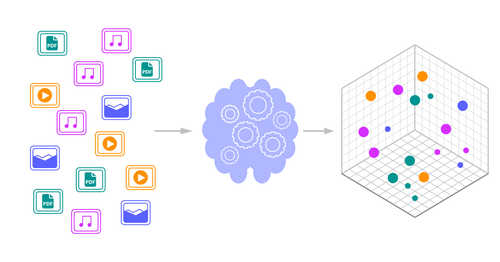)

In [1]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

## **2. Conversión de texto a *embeddings.***

La conversión de texto a *embeddings* es una técnica clave en el NLP, y tiene una gran importancia porque permite **representar el texto** en un formato numérico (**espacio vectorial**) que los modelos de machine learning pueden entender y procesar. Los embeddings son representaciones densas y de baja dimensión de datos textuales, donde palabras, frases o párrafos con significados similares están más cerca unos de otros en el espacio vectorial.

La potencia de este proceso permite lograr algunos aspectos clave en la compresión automática de texto, como:
* **Capturar la semántica y relaciones contextuales:** gracias a la representación y grado de proximidad en el espacio vectorial.
* **Reducción de dimensionalidsd:** los embeddings, por otro lado, convierten el texto en vectores de baja dimensión (como 100 o 300 dimensiones), lo que permite su análisis con una carga computacional que permite el procesamiento de grandes cantidades de datos.
* **Mejor manejo de palabras desconocidas (out-of-vocabulary):** en representaciones tradicionales, si una palabra no esta presente en el vocabulario de entrenamiento, no puede ser manejada. Con los embeddings, palabras no vistas previamente pueden ser representadas adecuadamente basándose en segmentos o subpalabras.
* **Comparación semántica:** al convertir texto en embeddings, se facilita la comparación de similitud semántica entre textos.
* **Multilingüismo y traducción automática:** se pueden representar palabras de diferentes idiomas en un espacio común, facilitando tareas como la traducción automática o la clasificación de texto multilingüe.

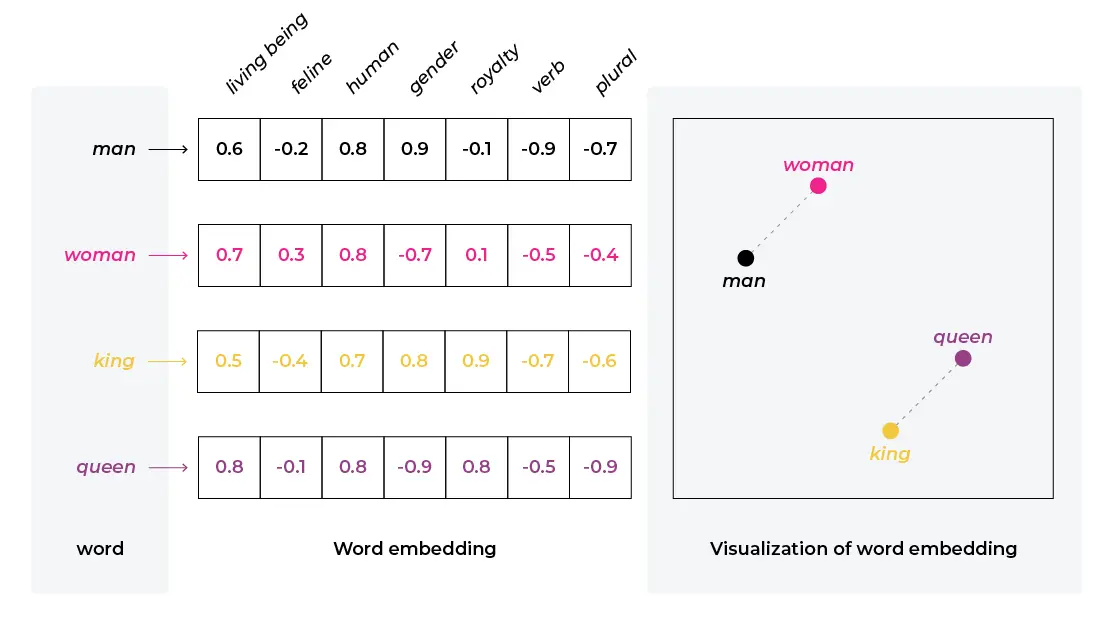

### **2.1. Ejercicio:** conversión de **texto simple**. 

Convierta el siguiente texto en incrustaciones de un espacio vectorial.

Texto:

```
"Los embeddings son una representación numérica de datos. Ayudan a capturar el significado semántico."
```

Para ello, se recomienda utilizar <code>SentenceTransformer('bert-base-nli-mean-tokens')</code> de <code>sentence-transformers</code>, un modelo BERT preentrenado que está optimizado para generar embeddings semánticos.

In [ ]:
#pip install transformers
#pip install sentence-transformers

# Para instalar esto en Visual Studio Code hay que usar el codigo: "python3 -m pip install transformers" en la terimal

In [5]:
from tqdm.autonotebook import tqdm, trange
from sentence_transformers import SentenceTransformer

# Cargar un modelo preentrenado (ejemplo: BERT)
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Texto
text = "Los embeddings son una representación numérica de datos. Ayudan a capturar el significado semántico."

# Convertir el párrafo en embeddings
embeddings = model.encode(text)

# Mostrar los embeddings
#print(embeddings)
print(f"Dimensión del embedding: {embeddings.shape}")

Dimensión del embedding: (768,)


Como se puede comprobar, se ha convertido el texto en un vector de **768 elementos**, es decir, el texto se ha reducido a **768 características** ***(features),*** un tamaño típico de modelos como BERT-base, que tienen 768 unidades en sus capas ocultas.

### **2.2. RAG** con **<code>LangChain</code>** y **<code>ChromaDB</code>**.

**RAG (Retrieval-Augmented Generation)** es una técnica que combina el poder de los modelos de lenguaje generativos, como GPT, con los de los ***modelos de recuperación de información*** de bases de datos o fuentes de conocimiento externas. La idea principal es utilizar un sistema de recuperación para obtener datos relevantes de una base de conocimiento y luego usar un ***modelo de lenguaje*** para generar respuestas o contenidos basados en la información recuperada.

**Ventajas** de esta combinación:
- **Respuestas más precisas**: el sistema no depende solo de la generación probabilística del modelo, sino que usa información relevante para aumentar la precisión.
- **Respuestas especializadas**: el sistema se puede basar en información de un dominio específico.
- **Datos actualizados**: es posible tener bases de datos actualizadas para proporcionar respuestas con información actualizada a tiempo real.
- **Aplicaciones complejas**: con **<code>LangChain</code>**, se puede combinar esta capacidad con otras fuentes de datos o flujos de trabajo complejos (APIs, bases de datos adicionales).

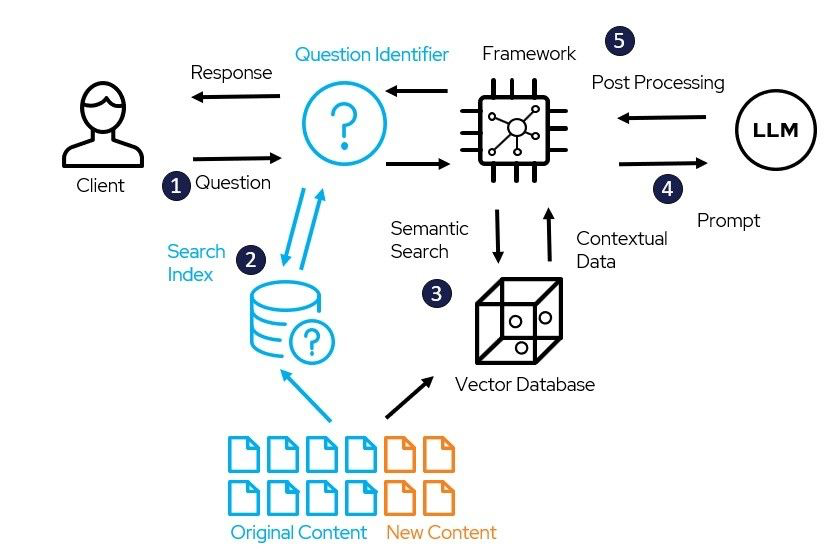

#### **2.2.1.** Conozca **<code>LangChain & ChromaDB</code>.**

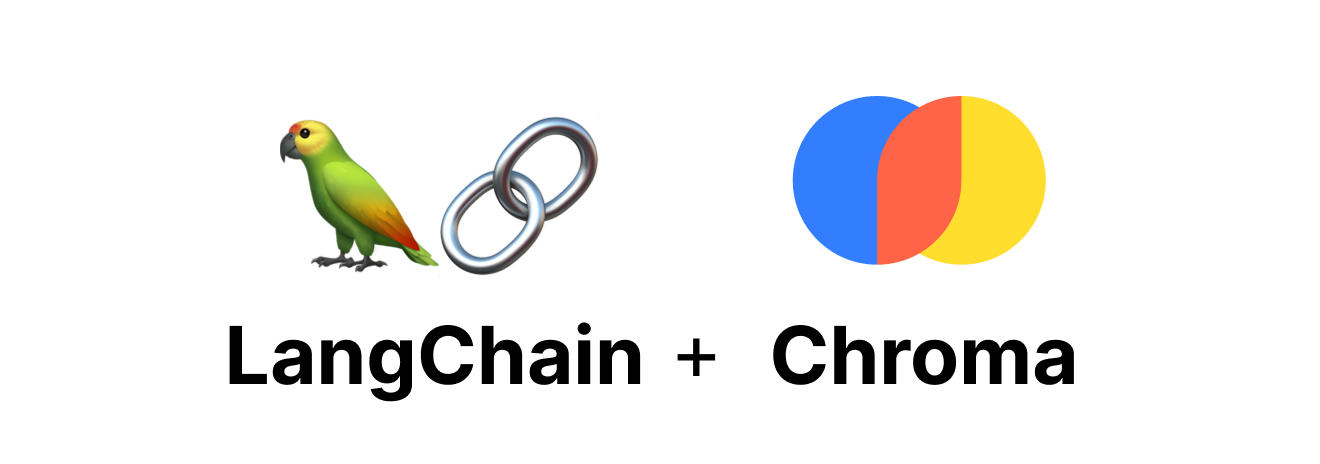

**<code>ChromaDB</code>** es una **base de datos vectorial** que permite almacenar, indexar y recuperar vectores. Como se ha visto anteriormente, la inforamción relativa a texto, imágenes u otros datos, puede ser expresada en forma de representaciones vectoriales numéricas (*embeddings*), generadas por modelos de **inteligencia artificial**, como los **modelos de lenguaje.**

**<code>LangChain</code>** es un framework desarrollado para construir aplicaciones con modelos de lenguaje que integran otras herramientas, en concreto, se actúa como un **orquestador**, sirviendo de enlace entre los modelos de lenguaje y otros elementos como:

1. **Bases de datos**.
2. **APIs externas**.
3. **Sistemas de recuperación de información**.

El flujo de una aplicación **RAG con **<code>LangChain</code>** y **<code>ChromaDB</code>**** sería el siguiente:

1. **Ingreso de pregunta**: el usuario formula una pregunta.
2. **Conversión de la consulta a vector** ***(embeddings)***: la pregunta se vectoriza mediante un modelo de embeddings.
4. **Búsqueda en <code>ChromaDB</code>**: se compara el vector de la pregunta con los vectores almacenados en la base de datos de la aplicación, la cual se contruido como resultado de la vectorización de **documentos provenientes de fuentes externas**.
5. **Recuperación de documentos relevantes**: <code>ChromaDB</code> devuelve los documentos más relevantes en base a la **similitud con los vectores de búsqueda**.
6. **Generación de respuesta**: el **LLM** genera una respuesta utilizando la información recuperada.


**<code>LangChain</code>** permite **integrar** todo este flujo encargándose de:
   - Orquestar el proceso de **transformación de texto a vectores**: integra el modelo de embeddings (preentrenado como GPT o HuggingFace, u otros) que vectoriza la consulta.
   - **Conectar el modelo de lenguaje con <code>ChromaDB</code>**.
   - **Gestionar la recuperación de información de <code>ChromaDB</code> y la generación final de texto por el LLM:** coordina el flujo entre los datos recuperados y el modelo de lenguaje para que este último pueda crear una respuesta utilizando los documentos relevantes.

***En esencia, <code>LangChain</code> permite conectar, coordinar y automatizar todo el flujo RAG de manera eficiente y escalable.***

#### **2.2.2. Ejercicio:** implementación de una aplicación ***Retrieval-Augmented Generation.***

**Ejercicio**

*Por problemas de compatibilidad de versiones, este ejercicio se ha desarrollado en el cuaderno <code>Practica_3.2_Bases_de_datos_vectoriales</code>.*

## **3. Conversión de imágenes a *embeddings.***

La conversión de **imágenes** en embeddings tiene múltiples aplicaciones en el **campo de la visión artificial**. Al igual que con el procesamiento de texto, los embeddings permiten **representar** imágenes de manera eficiente extrayendo sus **características** ***(features)*** esenciales en forma de **vectores numéricos**.

Entre las tareas que permite resolver este proceso, se encuentran las siguientes:
* **Extracción de características de las imágenes:** este proceso es la base de las **Redes Neuronales Convolucionales (CNNs)**, que reducen las imágenes a mapas de características de baja dimensión, que más tarde son convertidos a vectores de características.
* **Reducción de la dimensionalidad:** para tareas como clasificación o *clustering*.
* **Búsqueda de imágenes similares.**
* **Detección de duplicados**.
* **Sistemas de recomendación basados en imágenes**.

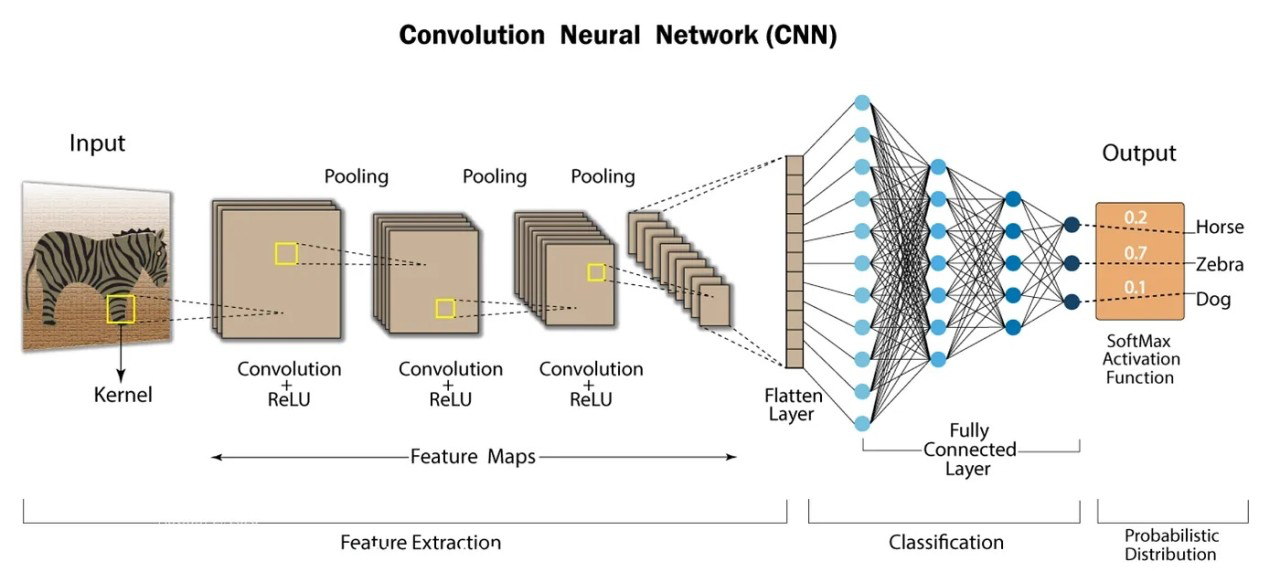

### **3.1. Ejercicio:** convierta el popular dataset de **imágenes** MNIST en una base de datos vectorial.

Para este ejercicio se utilizará la base de datos [MNIST](https://yann.lecun.com/exdb/mnist/), un popular dataset que contiene **imágenes de dígitos escritos a mano**. En total, el dataset cuenta con un conjunto de entrenamiento de 60.000 imágenes, más otras 10.000 de test. Los dígitos han sido normalizados en tamaño y centrados en una imagen de tamaño fijo.

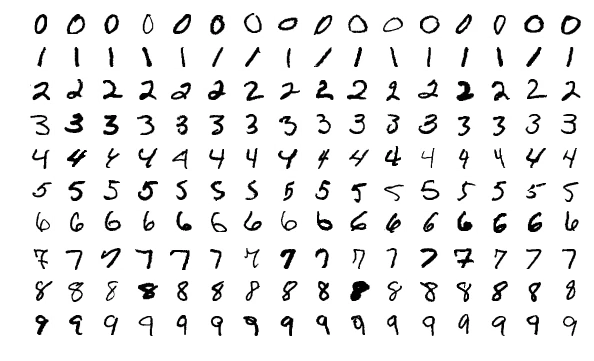

La conversión de imágenes a vectores, implica la extracción de una serie de descriptores matemáticos numéricos de cada imagen, que idealmente contengan toda la información contenida en la misma. A estos descriptores les llamaremos *features*, y en este ejemplo, utilizaremos una **red neuronal convolucional** para su extracción, lo que hace que comunmente se les denomine *deep features.*

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [9]:
# Cargar el dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print ('X_train:', x_train.shape)
print ('y_train:', y_train.shape)

print ('X_test:', x_test.shape)
print ('y_test:', y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [10]:
# Normalizar los valores de píxel: todos los colores de los pixeles ahora tendran un valor entre 0 y 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [11]:
# Añadir un tercer canal, por lo que ahora serán imágenes en RGB
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print ('X_train:', x_train.shape)
print ('X_test:', x_test.shape)

X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)


In [12]:
# Codificar las etiquetas de acuerdo con one-hot-encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

print ('y_train:', y_train.shape)
print ('y_test:', y_test.shape)

(60000, 10)
y_train: (60000, 10)
y_test: (10000, 10)


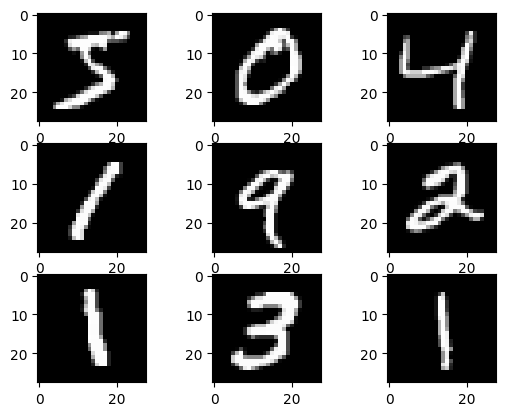

In [13]:
# Visualizar las nueve primeras imágenes
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [14]:
# Definir el modelo

model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Entrenar el modelo
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7656 - loss: 0.7650 - val_accuracy: 0.9773 - val_loss: 0.0831
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9643 - loss: 0.1218 - val_accuracy: 0.9833 - val_loss: 0.0570
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9726 - loss: 0.0875 - val_accuracy: 0.9882 - val_loss: 0.0460
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9779 - loss: 0.0714 - val_accuracy: 0.9887 - val_loss: 0.0425
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9817 - loss: 0.0603 - val_accuracy: 0.9907 - val_loss: 0.0378
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9837 - loss: 0.0526 - val_accuracy: 0.9895 - val_loss: 0.0364
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 0.9922 - val_loss: 0.0309
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9840 - loss: 0.0493 - val_accu

In [16]:
# Evaluar el modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02154311165213585
Test accuracy: 0.9925000071525574


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicción del modelo: 7


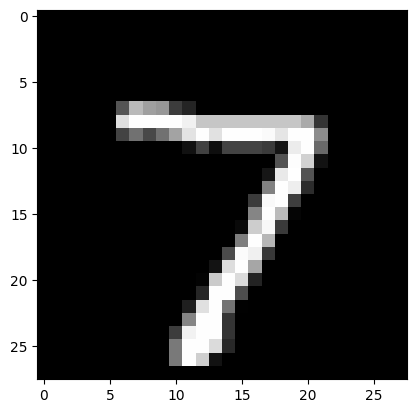

In [25]:
# Hacer una predicción
print('Predicción del modelo:', np.argmax(model.predict(x_test[0:1])))
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))

In [28]:
# Generar un submodelo a partir del primer que de como salida el output de la capa Flatten
flatten_output_model = keras.Model(inputs=model.inputs, outputs=model.layers[4].output)

# Obtener una predicción
flatten_output = flatten_output_model.predict(x_test[0:1])
print('Número de características del vector de salida:', flatten_output.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Número de características del vector de salida: (1, 1600)


/Users/mariaangellobon/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


In [29]:
# Realizar este mismo paso para todas las imágenes,
# Se generará una matriz en la que cada fila es una imagen y cada columna una característica
images_features= flatten_output_model.predict(x_train)
images_features.shape

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


(60000, 1600)